In [1]:
import time
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
#index = range(0, 57)    # cosi la prima riga è l'indice delle colonne
spam_data = pd.read_csv('spam_tfidf.csv', index_col=[0])

spam_data.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,targhet
0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,1.186630,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,0.315593,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [3]:
X = spam_data.drop('targhet', axis=1)
y = spam_data['targhet']  # colonna che segna se è spam o meno
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Training time with 1 neighbors: 0.007502
Prediction time: 0.091684
Missclassified examples: 82
Accuracy: 0.911
Training time with 2 neighbors: 0.003227
Prediction time: 0.093118
Missclassified examples: 83
Accuracy: 0.910
Training time with 3 neighbors: 0.005187
Prediction time: 0.070750
Missclassified examples: 72
Accuracy: 0.922
Training time with 4 neighbors: 0.004447
Prediction time: 0.069927
Missclassified examples: 74
Accuracy: 0.920
Training time with 5 neighbors: 0.006194
Prediction time: 0.070163
Missclassified examples: 75
Accuracy: 0.919
Training time with 10 neighbors: 0.004571
Prediction time: 0.073052
Missclassified examples: 75
Accuracy: 0.919
Training time with 15 neighbors: 0.003258
Prediction time: 0.073018
Missclassified examples: 76
Accuracy: 0.917
Training time with 20 neighbors: 0.003204
Prediction time: 0.083686
Missclassified examples: 79
Accuracy: 0.914
Training time with 25 neighbors: 0.003209
Prediction time: 0.087450
Missclassified examples: 79
Accuracy: 0.9

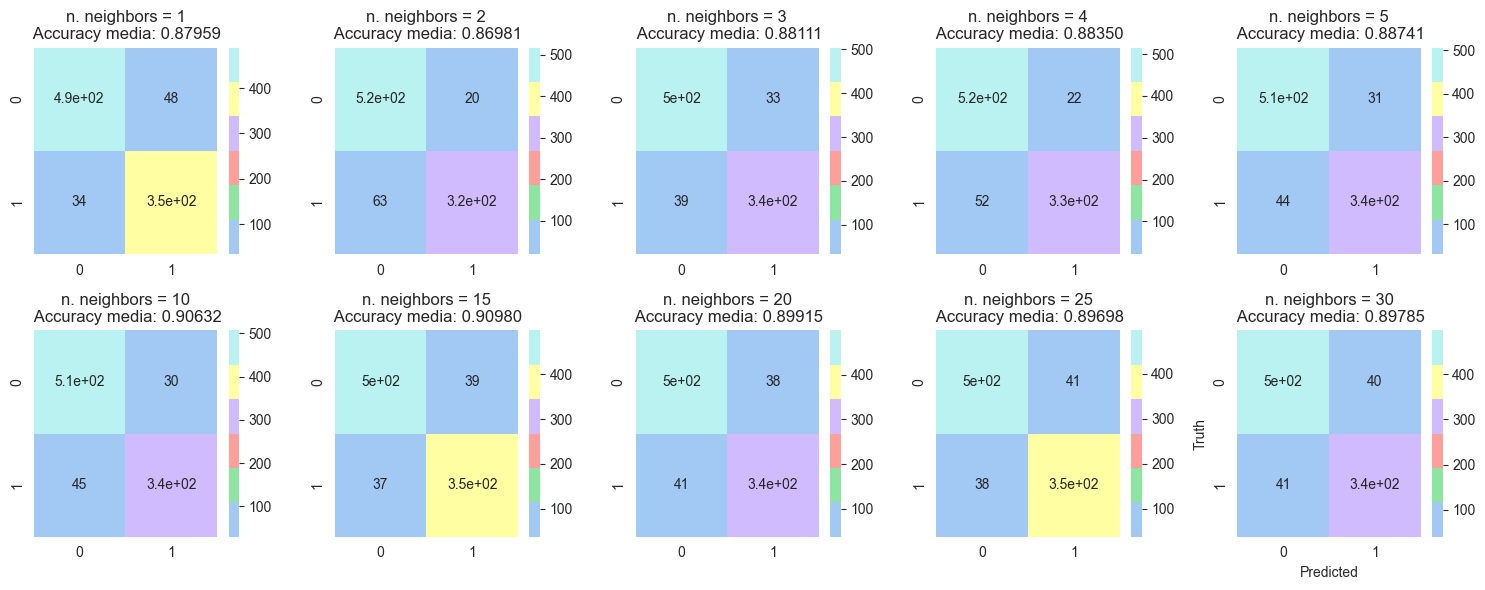

In [4]:
# facciamo training in cross validation con vari numeri di vicini
nneighbor: list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    KNN = KNeighborsClassifier(n_neighbors=nneighbor[i])
    start_time = time.time()
    KNN.fit(X_train, y_train)
    print(f'Training time with {nneighbor[i]} neighbors: %f' % (time.time() - start_time))
    KNN.score(X_test, y_test)
    start_time = time.time()
    y_predict = KNN.predict(X_test)
    print('Prediction time: %f' % (time.time() - start_time))
    print('Missclassified examples: %d' % (y_test != y_predict).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
    score = cross_val_score(KNN, X, y, cv=10)
    cm = confusion_matrix(y_test, y_predict)
    sn.heatmap(cm, annot=True, ax=axs[int(i / 5), i % 5], cmap=sn.color_palette("pastel6").as_hex())
    axs[int(i / 5), i % 5].set_title('n. neighbors = ' + str(nneighbor[i]) + '\n Accuracy media: %.5f' %np.mean(score))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.tight_layout()
plt.show()

In [5]:
fig.savefig('confusion matrix knn.png', bbox_inches='tight')